In [1]:
from PIL import Image
import os

def convert_tif_to_png(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for filename in os.listdir(input_dir):
        if filename.endswith(".tif"):
            tif_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + ".png")
            with Image.open(tif_path) as tif_image:
                tif_image.save(output_path, "PNG")

# Example usage
input_dir = "4cam_auth"
output_dir = "4cam_original"
convert_tif_to_png(input_dir, output_dir)


In [2]:
from PIL import Image
import os

def convert_tif_to_png(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for filename in os.listdir(input_dir):
        if filename.endswith(".tif"):
            tif_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + ".png")
            with Image.open(tif_path) as tif_image:
                tif_image.save(output_path, "PNG")

# Example usage
input_dir = "4cam_splc"
output_dir = "4cam_spliced"
convert_tif_to_png(input_dir, output_dir)

In [3]:
import os
import random
import shutil

# Define the paths to your original and spliced image folders
original_images_folder = '4cam_original'
spliced_images_folder = '4cam_spliced'

# Define the output paths for the training and testing sets
training_folder = 'training_set'
testing_folder = 'testing_set'

# Set the ratio of training to testing images (e.g., 80:20)
training_ratio = 0.8

# Create the output directories if they don't exist
os.makedirs(os.path.join(training_folder, 'original'), exist_ok=True)
os.makedirs(os.path.join(training_folder, 'spliced'), exist_ok=True)
os.makedirs(os.path.join(testing_folder, 'original'), exist_ok=True)
os.makedirs(os.path.join(testing_folder, 'spliced'), exist_ok=True)

# Collect the list of original image files
original_files = os.listdir(original_images_folder)
# Collect the list of spliced image files
spliced_files = os.listdir(spliced_images_folder)

# Shuffle the file lists to ensure randomness
random.shuffle(original_files)
random.shuffle(spliced_files)

# Determine the number of images for training and testing based on the ratio
num_training_original = int(len(original_files) * training_ratio)
num_testing_original = len(original_files) - num_training_original
num_training_spliced = int(len(spliced_files) * training_ratio)
num_testing_spliced = len(spliced_files) - num_training_spliced

# Move original images to the training set
for file in original_files[:num_training_original]:
    src = os.path.join(original_images_folder, file)
    dst = os.path.join(training_folder, 'original', file)
    shutil.copy(src, dst)

# Move original images to the testing set
for file in original_files[num_training_original:]:
    src = os.path.join(original_images_folder, file)
    dst = os.path.join(testing_folder, 'original', file)
    shutil.copy(src, dst)

# Move spliced images to the training set
for file in spliced_files[:num_training_spliced]:
    src = os.path.join(spliced_images_folder, file)
    dst = os.path.join(training_folder, 'spliced', file)
    shutil.copy(src, dst)

# Move spliced images to the testing set
for file in spliced_files[num_training_spliced:]:
    src = os.path.join(spliced_images_folder, file)
    dst = os.path.join(testing_folder, 'spliced', file)
    shutil.copy(src, dst)

print("Dataset preparation completed!")


Dataset preparation completed!


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'training_set',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'testing_set',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32,
    epochs=10
)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(test_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Found 290 images belonging to 2 classes.
Found 73 images belonging to 2 classes.
Epoch 1/10
9/9 [==============================] - 52s 5s/step - loss: 3.3640 - accuracy: 0.4961 - val_loss: 0.9498 - val_accuracy: 0.7188
Epoch 2/10
9/9 [==============================] - 40s 4s/step - loss: 0.9695 - accuracy: 0.5853 - val_loss: 0.9732 - val_accuracy: 0.6875
Epoch 3/10
9/9 [==============================] - 33s 4s/step - loss: 0.9616 - accuracy: 0.6589 - val_loss: 0.9353 - val_accuracy: 0.6719
Epoch 4/10
9/9 [==============================] - 35s 4s/step - loss: 0.9110 - accuracy: 0.6434 - val_loss: 0.9825 - val_accuracy: 0.4375
Epoch 5/10
9/9 [==============================] - 35s 4s/step - loss: 0.8841 - accuracy: 0.5698 - val_loss: 0.8273 - val_accuracy: 0.6562
Epoch 6/10
9/9 [==============================] - 35s 4s/step - loss: 0.9059 - accuracy: 0.6240 - val_loss: 0.8043 - val_accuracy: 0.5781
Epoch 7/10
9/9 [==============================] - 35s 4s/step - loss: 0.8304 - accuracy: 0.

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import precision_score, recall_score

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'training_set',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'testing_set',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32,
    epochs=10
)

# Evaluate the model on the testing set
predictions = model.predict(test_generator)
y_pred = np.where(predictions > 0.5, 1, 0)

precision = precision_score(test_generator.classes, y_pred)
recall = recall_score(test_generator.classes, y_pred)

loss, accuracy = model.evaluate(test_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Found 290 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


Epoch 1/10
9/9 [==============================] - 40s 5s/step - loss: 3.2739 - accuracy: 0.5736 - val_loss: 0.9032 - val_accuracy: 0.5469
Epoch 2/10
9/9 [==============================] - 38s 4s/step - loss: 0.9870 - accuracy: 0.5310 - val_loss: 1.0114 - val_accuracy: 0.5469
Epoch 3/10
9/9 [==============================] - 44s 4s/step - loss: 1.0244 - accuracy: 0.6279 - val_loss: 0.9961 - val_accuracy: 0.7188
Epoch 4/10
9/9 [==============================] - 37s 4s/step - loss: 0.9937 - accuracy: 0.7093 - val_loss: 0.9553 - val_accuracy: 0.6250
Epoch 5/10
9/9 [==============================] - 35s 4s/step - loss: 1.0207 - accuracy: 0.5543 - val_loss: 0.9841 - val_accuracy: 0.6406
Epoch 6/10
9/9 [==============================] - 35s 4s/step - loss: 0.9738 - accuracy: 0.6202 - val_loss: 0.9326 - val_accuracy: 0.4844
Epoch 7/10
9/9 [==============================] - 36s 4s/step - loss: 0.9313 - accuracy: 0.7016 - val_loss: 0.8767 - val_accuracy: 0.7656
Epoch 8/10
9/9 [==================

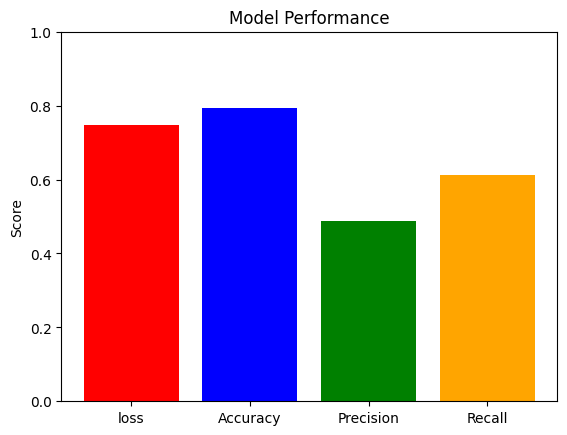

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy, precision, and recall
x = ['loss','Accuracy', 'Precision', 'Recall']
y = [loss,accuracy, precision, recall]
colors = ['red','blue', 'green', 'orange'] 
plt.bar(x, y,color=colors)
plt.ylim(0, 1.0)
plt.ylabel('Score')
plt.title('Model Performance')
plt.show()


In [5]:
model.summary()
model.save("splicing_detect.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

In [23]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model = load_model('splicing_detect.h5')

# Load and preprocess the image
img_path = 'testing_set/original/canonxt_29_sub_08.png'
image_size = (256, 256)
img = image.load_img(img_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the image

# Expand the dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
probability_spliced = predictions[0][0]
threshold = 0.6 # Adjust the threshold as needed

if probability_spliced >= threshold:
    print("The image is likely spliced.")
else:
    print("The image is likely authentic.")


1/1 [==============================] - 0s 164ms/step
The image is likely authentic.


In [3]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Function to analyze the image and mark merged regions
def mark_merged_regions(image_path, model, threshold=0.6):
    # Load and preprocess the image
    image_size = (256, 256)
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image

    # Expand the dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img_array)
    probability_spliced = predictions[0][0]

    if probability_spliced >= threshold:
        print("The image is likely spliced.")

        # Load the image using OpenCV for visualization
        img_cv = cv2.imread(image_path)

        # Convert the image to grayscale
        img_gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

        # Apply adaptive thresholding to obtain a binary mask of potential merged regions
        _, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Find contours of the potential merged regions
        contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Iterate over the contours and mark the merged regions
        for contour in contours:
            # Calculate the contour area
            area = cv2.contourArea(contour)

            # If the area is above a certain threshold, consider it a merged region
            if area > 100:
                # Draw a filled contour to mark the merged region
                cv2.drawContours(img_cv, [contour], -1, (0, 0, 255), cv2.FILLED)

        # Display the output image with marked merged regions
        cv2.imshow('Output Image', img_cv)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    else:
        print("The image is likely authentic.")

# Load the model
model = load_model('splicing_detect.h5')

# Analyze the image and mark merged regions
img_path = 'testing_set/spliced/spliced1.png'
mark_merged_regions(img_path, model)


1/1 [==============================] - 0s 283ms/step
The image is likely spliced.


In [131]:
predictions = model.predict(img_array)

print(type(predictions))
print(dir(predictions))


1/1 [==============================] - 0s 63ms/step
<class 'numpy.ndarray'>
['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__ne